In [29]:
import numpy as np
import pandas as pd
import random
import os
import gc

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from keras.models import Sequential

In [30]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
#import lstm, time #helper libraries

In [31]:
data = pd.read_csv("outputs/194.csv")

In [32]:
data

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,-0.167222,-0.220092,-2.146413,1.085153,-0.580143,-0.636593,0.960789,-1.163073,1.723667,0.114809,...,-0.170365,-1.095620,-0.845827,-1.220772,0.941183,-0.697923,0.104928,1.301459,-1.528616,-0.874732
1,0.497589,-0.218475,-1.926347,1.061314,-0.608431,-0.626403,0.129537,-1.051303,1.777281,0.165132,...,0.693888,-1.081652,-0.678997,-1.721066,-1.189598,-0.685752,-1.173816,-0.460874,-1.796684,-0.881867
2,0.131961,0.382625,-1.721470,1.010066,-0.595838,-0.625392,-0.264190,-0.947957,1.797179,0.138120,...,0.444662,-1.283087,-1.285356,-1.362706,-1.410982,-0.605276,0.083176,-0.537239,-1.632431,-0.855995
3,-0.407528,0.431602,-1.488228,0.830175,-0.528608,-0.618583,-1.398601,-0.845484,1.888197,0.080987,...,0.822857,0.791741,-1.715823,-1.304561,0.442616,-0.754237,-1.073166,0.046805,-1.679083,-0.817206
4,-0.028724,0.517307,-1.272062,1.161706,-0.516323,-0.632842,-1.272502,-0.704417,1.921564,0.165095,...,0.466347,-0.582876,-1.638609,-2.130669,-0.569905,-0.879612,0.675597,-0.028204,-1.575315,-0.863082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1.321046,0.382402,-0.693653,-0.876491,-0.428748,-0.212334,-0.277083,0.656136,2.197620,0.086913,...,0.761155,-0.694756,-0.717541,0.769126,-1.033787,-0.648952,-0.082722,-0.052041,-1.579982,-0.691136
1216,-0.206059,0.604906,-0.786892,-0.786426,-0.450898,-0.214482,-0.035429,0.030516,2.213227,0.145693,...,-0.831445,-0.730822,-0.877125,-1.161238,-1.164095,-0.611996,0.944268,-0.530056,-1.469723,-0.682624
1217,0.477665,0.380139,-0.594073,-0.663436,-0.368767,-0.212187,0.149785,-0.799389,2.223244,0.123488,...,-1.475681,0.605606,-0.860753,0.405561,0.675163,-0.506055,1.959251,1.937853,0.654362,-0.693283
1218,1.237748,0.409795,-0.211851,-0.788017,-0.423646,-0.215945,-0.015050,-1.449756,2.226181,0.063720,...,-0.437745,-0.819054,-1.081574,0.482149,0.967866,-0.522155,-1.386759,2.584658,-1.233330,-0.700759


In [33]:
train = data.iloc[0:1200,:]

In [34]:
train

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,-0.167222,-0.220092,-2.146413,1.085153,-0.580143,-0.636593,0.960789,-1.163073,1.723667,0.114809,...,-0.170365,-1.095620,-0.845827,-1.220772,0.941183,-0.697923,0.104928,1.301459,-1.528616,-0.874732
1,0.497589,-0.218475,-1.926347,1.061314,-0.608431,-0.626403,0.129537,-1.051303,1.777281,0.165132,...,0.693888,-1.081652,-0.678997,-1.721066,-1.189598,-0.685752,-1.173816,-0.460874,-1.796684,-0.881867
2,0.131961,0.382625,-1.721470,1.010066,-0.595838,-0.625392,-0.264190,-0.947957,1.797179,0.138120,...,0.444662,-1.283087,-1.285356,-1.362706,-1.410982,-0.605276,0.083176,-0.537239,-1.632431,-0.855995
3,-0.407528,0.431602,-1.488228,0.830175,-0.528608,-0.618583,-1.398601,-0.845484,1.888197,0.080987,...,0.822857,0.791741,-1.715823,-1.304561,0.442616,-0.754237,-1.073166,0.046805,-1.679083,-0.817206
4,-0.028724,0.517307,-1.272062,1.161706,-0.516323,-0.632842,-1.272502,-0.704417,1.921564,0.165095,...,0.466347,-0.582876,-1.638609,-2.130669,-0.569905,-0.879612,0.675597,-0.028204,-1.575315,-0.863082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.309131,0.264330,-3.875984,1.143737,-0.877668,-0.239955,-0.892117,-0.943745,2.597846,0.019453,...,0.130953,-0.580199,-2.348848,-4.034998,-0.574733,-0.742297,0.661888,-0.030694,-0.618249,-0.698762
1196,-0.224711,-0.687728,-3.695241,0.479572,-0.659309,-0.244987,-0.909944,-0.456240,2.207376,0.008733,...,0.119899,-0.432784,-2.835746,-4.463651,-1.162714,-0.979057,-0.578861,-0.946017,-0.647768,-0.699836
1197,-0.451024,-0.664906,-3.086855,0.479266,-0.950936,-0.260181,0.233375,-0.641943,2.269872,0.031617,...,-0.987360,-0.445056,-1.553017,-4.683969,-0.019464,-0.725246,1.477493,-0.292235,-0.654525,-0.655842
1198,0.955219,-0.928765,-2.818781,0.444392,-0.912212,-0.261532,0.441482,-0.649659,2.862851,0.102138,...,0.006498,-1.089976,-1.277140,-3.791090,-3.842231,-0.819210,0.535601,-1.248243,-0.520704,-0.624348


In [35]:
test = data.iloc[1200:1220,:]

In [36]:
test

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
1200,-0.388862,-0.576118,-2.256480,0.728704,-0.645056,-0.222639,0.251013,-1.017498,1.950420,0.114231,...,1.386571,-1.775582,-1.933540,1.732103,-1.141914,-1.103318,-1.371886,-0.890489,-1.293151,-0.760900
1201,0.151237,0.562415,-1.603671,0.711578,-0.942573,-0.195935,0.327019,-1.457840,1.860258,0.073387,...,-0.007629,0.094561,-1.163421,2.197241,0.033021,-0.830091,0.064859,0.682657,-1.503712,-0.742444
1202,0.108343,0.470977,-1.400266,1.045642,-1.009884,-0.207436,1.404172,-1.711264,2.282404,0.053512,...,1.593927,-1.954731,-1.525491,1.520137,-2.179821,-0.670554,-0.736031,-0.059645,-1.431340,-0.768825
1203,0.285639,0.769531,-1.430413,0.794970,-0.953110,-0.167827,0.716473,-1.296125,2.218155,0.120134,...,1.541874,-1.557828,-1.161860,1.820073,-0.689433,-0.752511,0.273330,0.204361,-1.643266,-0.662901
1204,0.373708,1.387345,-1.812492,0.960185,-0.898308,-0.139478,1.290509,-0.419035,2.391319,0.062192,...,0.463400,-1.262399,-1.447181,1.648033,0.342298,-0.849825,0.716225,-0.166604,-1.718417,-0.696992
1205,-0.310372,0.660679,-1.059033,0.724078,-1.043396,-0.138545,1.574977,0.592304,2.545751,0.104339,...,0.971259,-1.063429,-1.388197,1.923317,-0.225541,-1.104059,1.494115,-0.433673,-1.861478,-0.737609
1206,-0.177045,0.634468,-0.823140,0.186091,-0.746983,-0.163348,1.132282,0.649955,2.410993,0.094901,...,-0.117946,-1.039923,-1.414050,0.552249,-0.649452,-0.910348,1.755360,-1.072873,-1.451275,-0.650205
1207,-0.036249,0.271279,-0.435315,0.677968,-0.814920,-0.212572,0.353757,1.290508,2.394673,0.104192,...,0.668037,-0.996713,-1.634724,0.947363,-0.684237,-0.728031,2.620136,-0.444653,-0.880868,-0.648300
1208,0.418415,-0.062404,0.637038,0.704826,-0.753951,-0.240422,-0.205459,0.257120,2.017735,0.103443,...,-0.015306,-1.432063,-1.280308,1.532286,0.184122,-0.762926,1.784992,-1.483139,-1.314424,-0.639203
1209,0.787667,0.351999,0.426803,0.580572,-0.857420,-0.219692,0.630179,-0.534320,2.136387,0.151137,...,-0.205836,-2.300155,-0.963615,1.190059,1.320023,-0.876935,3.277130,-0.241014,-0.862675,-0.624495


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train)
scaled = scaler.transform(train)
train = pd.DataFrame(scaled,columns= train.columns)

In [39]:
train

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0.485441,0.694823,0.249444,0.583804,0.224014,0.272345,0.733449,0.349901,0.368842,0.250164,...,0.540341,0.543921,0.421182,0.724581,0.601922,0.847793,0.515407,0.583872,0.247277,0.222704
1,0.591504,0.694970,0.278005,0.579676,0.218269,0.284960,0.616695,0.365161,0.382352,0.307558,...,0.639095,0.545728,0.440012,0.691343,0.354078,0.850344,0.322437,0.436447,0.206377,0.216264
2,0.533172,0.749493,0.304594,0.570802,0.220826,0.286212,0.561393,0.379270,0.387365,0.276751,...,0.610617,0.519670,0.371572,0.715151,0.328328,0.867211,0.512124,0.430059,0.231438,0.239618
3,0.447103,0.753936,0.334865,0.539651,0.234479,0.294642,0.402058,0.393261,0.410300,0.211590,...,0.653832,0.788073,0.322985,0.719014,0.543931,0.835989,0.337626,0.478916,0.224320,0.274631
4,0.507537,0.761709,0.362919,0.597061,0.236974,0.276988,0.419770,0.412520,0.418708,0.307516,...,0.613095,0.610250,0.331700,0.664130,0.426158,0.809710,0.601524,0.472641,0.240152,0.233221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.462801,0.738763,0.024977,0.593949,0.163593,0.763381,0.473197,0.379846,0.589114,0.141409,...,0.574771,0.610597,0.251534,0.537613,0.425597,0.838492,0.599455,0.472433,0.386175,0.381545
1196,0.476270,0.652406,0.048434,0.478938,0.207937,0.757152,0.470693,0.446403,0.490725,0.129183,...,0.573508,0.629666,0.196578,0.509134,0.357205,0.788866,0.412219,0.395863,0.381671,0.380576
1197,0.440164,0.654477,0.127392,0.478885,0.148714,0.738342,0.631279,0.421050,0.506472,0.155283,...,0.446986,0.628079,0.341361,0.494497,0.490183,0.842066,0.722535,0.450554,0.380640,0.420287
1198,0.664513,0.630543,0.162183,0.472846,0.156578,0.736670,0.660509,0.419996,0.655889,0.235713,...,0.560550,0.544651,0.372499,0.553817,0.045534,0.822370,0.580398,0.370581,0.401058,0.448715


In [40]:
scaler = MinMaxScaler().fit(test)
scaled = scaler.transform(test)
test = pd.DataFrame(scaled,columns= test.columns)

In [41]:
test

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0.321180,0.363399,0.000000,0.843296,0.590458,0.174558,0.537944,0.239693,0.131528,0.684932,...,0.836101,0.142082,0.000000,0.890871,0.322665,0.001238,0.090803,0.138162,0.225899,0.054906
1,0.535595,0.732538,0.225611,0.834829,0.149450,0.436670,0.564469,0.094634,0.000000,0.336242,...,0.428837,0.648616,0.633322,1.000000,0.626408,0.458138,0.371784,0.504904,0.142206,0.182780
2,0.518567,0.702891,0.295907,1.000000,0.049675,0.323784,0.940390,0.011151,0.615828,0.166567,...,0.896672,0.093559,0.335567,0.841141,0.054346,0.724919,0.215156,0.331854,0.170972,0.000000
3,0.588952,0.799690,0.285489,0.876060,0.133831,0.712575,0.700387,0.147907,0.522101,0.735321,...,0.881467,0.201062,0.634606,0.911510,0.439639,0.587869,0.412554,0.393401,0.086735,0.733904
4,0.623914,1.000000,0.153442,0.957747,0.215064,0.990837,0.900722,0.436839,0.774713,0.240670,...,0.566431,0.281079,0.399967,0.871147,0.706362,0.425138,0.499170,0.306919,0.056864,0.497701
5,0.352340,0.764397,0.413838,0.841009,0.000000,1.000000,1.000000,0.769996,1.000000,0.600479,...,0.714783,0.334971,0.448473,0.935733,0.559565,0.000000,0.651300,0.244658,0.000000,0.216280
6,0.405270,0.755899,0.495362,0.575013,0.439371,0.756534,0.845502,0.788988,0.803414,0.519906,...,0.396612,0.341338,0.427213,0.614059,0.449975,0.323929,0.702391,0.095644,0.163048,0.821868
7,0.461165,0.638145,0.629395,0.818211,0.338669,0.273369,0.573801,1.000000,0.779607,0.599222,...,0.626208,0.353041,0.245737,0.706759,0.440983,0.628805,0.871513,0.242099,0.389774,0.835069
8,0.641662,0.529957,1.000000,0.831490,0.429043,0.000000,0.378637,0.659579,0.229728,0.592833,...,0.426595,0.235125,0.537198,0.843991,0.665470,0.570453,0.708186,0.000000,0.217444,0.898093
9,0.788253,0.664316,0.927342,0.770056,0.275672,0.203476,0.670270,0.398862,0.402818,1.000000,...,0.370938,0.000000,0.797637,0.763699,0.959122,0.379804,1.000000,0.289572,0.397006,1.000000


In [42]:
train_X  = train.loc[:,train.columns != 'target']
train_X = np.array(train_X)
train_y = train.loc[:,train.columns =="target"]
train_y = np.array(train_y)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))

In [43]:
test_X  = test.loc[:,test.columns != 'target']
test_X = np.array(test_X)
test_y = test.loc[:,test.columns =="target"]
test_y = np.array(test_y)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#test_X =test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [44]:
X = data.loc[:,data.columns != 'target']
X = np.array(X)
y = data.loc[:,data.columns =="target"]
y = np.array(y)

In [45]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [46]:
X.shape

(1220, 1, 300)

In [47]:
model = Sequential()
model.add(LSTM(50, batch_input_shape=(20, train_X.shape[1], train_X.shape[2]),stateful=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [48]:
model.add(LSTM(50, batch_input_shape=(20, train_X.shape[1], train_X.shape[2]),stateful=True))
#model.add(LSTM(50, batch_input_shape=(1220, X.shape[1], X.shape[2]),stateful=True))

In [49]:
model.add(Dense(1))

In [50]:
model.compile(optimizer='adam', loss='mse')

In [51]:
n_features = 1

In [52]:
#X = X.reshape((X.shape[0], X.shape[1], n_features))

In [53]:
%%time
#model.fit(X,y,epochs = 200, verbose = 0)
model.fit(train_X, train_y, epochs=500, batch_size=20, verbose=0, shuffle=False)
#model.fit(X, y, epochs=200, batch_size=1220, verbose=0, shuffle=False)


Wall time: 22 s


In [258]:
import pickle
from keras.models import load_model

In [259]:
model.save('LA.h5')
#pickle.dump(model, open('LA.pkl', 'wb'))

In [205]:
del model

In [206]:
model = load_model('LA.h5')

In [23]:
pred = model.predict(test_X,batch_size=20)

In [55]:
time_id = []
for i in range(20):
    time_id.append(i)

In [56]:
len(time_id)

20

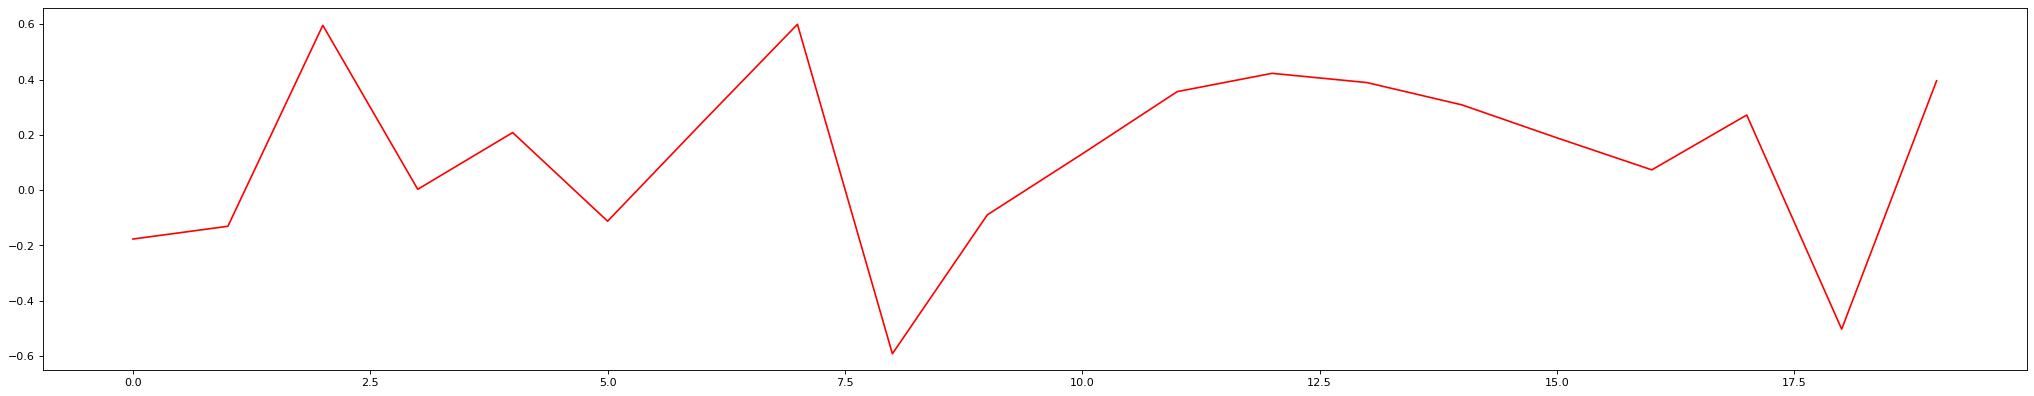

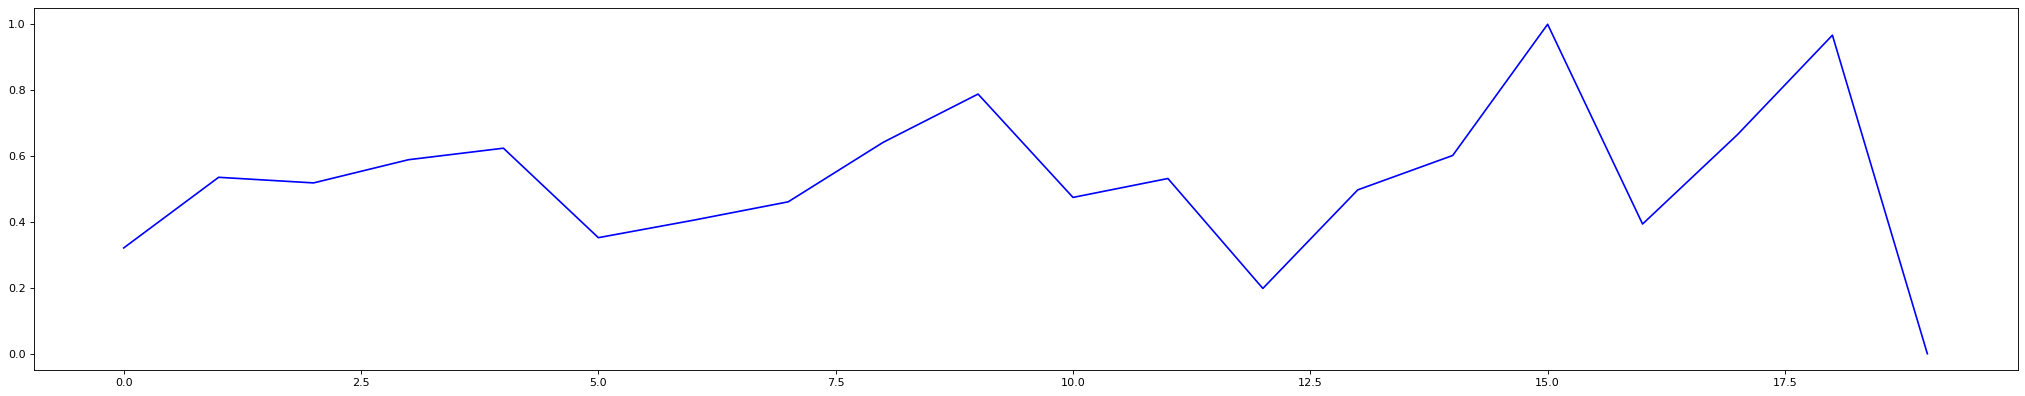

In [58]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(32, 6), dpi=80)
plt.plot(time_id,pred,color = "r")
plt.show()
figure(figsize=(32, 6), dpi=80)
plt.plot(time_id,test_y,color = "b")
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,pred)

0.3648743623239158

array([[[-0.2200923 ],
        [-2.14641285],
        [ 1.08515251],
        ...,
        [ 1.30145884],
        [-1.52861595],
        [-0.87473249]],

       [[-0.21847548],
        [-1.92634737],
        [ 1.06131351],
        ...,
        [-0.46087402],
        [-1.79668379],
        [-0.88186705]],

       [[ 0.38262492],
        [-1.72147012],
        [ 1.01006556],
        ...,
        [-0.53723896],
        [-1.63243103],
        [-0.85599482]],

       ...,

       [[ 0.38013923],
        [-0.59407252],
        [-0.663436  ],
        ...,
        [ 1.93785334],
        [ 0.6543622 ],
        [-0.69328266]],

       [[ 0.40979517],
        [-0.21185113],
        [-0.78801727],
        ...,
        [ 2.58465838],
        [-1.23333049],
        [-0.70075929]],

       [[ 0.73267043],
        [-0.06991468],
        [-0.97689134],
        ...,
        [ 2.80637836],
        [-0.18696363],
        [-0.69270647]]])

In [ ]:
%%time
#forj in [100,500,1000]:
from statistics import mean
mse_list = []
mse_id = []
mse_mean = []
min_mse = 1000
model.reset_states()
for j in range(1,1000):
    for i in range(10):
        model = Sequential()
        model.add(LSTM(1, batch_input_shape=(20, train_X.shape[1], train_X.shape[2]),stateful=True))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(train_X, train_y, epochs=1, batch_size=20, verbose=0, shuffle=False)
        model.reset_states()
        mse = mean_squared_error(test_y,model.predict(test_X,batch_size=20))
        mse_mean.append(mse)
    
    mse_list.append(mean(mse_mean))
    mse_id.append(i)
    mse_mean = []


plt.plot(mse_id,mse_list)
plt.show()

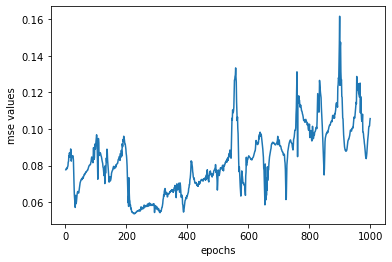

In [75]:
plt.plot(mse_id,mse_list,label='mse')
plt.ylabel("mse values")
plt.xlabel("epochs")
plt.show()

In [72]:
mse_list.index(min(mse_list))

224

In [69]:
mse_id

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
